In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [12]:
df=pd.read_csv('C:\\Users\\Student\\Desktop\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [15]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [24]:
classifier=Sequential()


In [25]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [26]:
classifier.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))



In [27]:
classifier.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 1s 1ms/step - loss: 0.6284 - accuracy: 0.6742 - val_loss: 0.5819 - val_accuracy: 0.7596
Epoch 2/10
536/536 [==============================] - 0s 832us/step - loss: 0.5430 - accuracy: 0.7893 - val_loss: 0.5288 - val_accuracy: 0.7914
Epoch 3/10
536/536 [==============================] - 0s 814us/step - loss: 0.5022 - accuracy: 0.7966 - val_loss: 0.4996 - val_accuracy: 0.7917
Epoch 4/10
536/536 [==============================] - 0s 817us/step - loss: 0.4781 - accuracy: 0.7962 - val_loss: 0.4815 - val_accuracy: 0.7917
Epoch 5/10
536/536 [==============================] - 0s 870us/step - loss: 0.4630 - accuracy: 0.7964 - val_loss: 0.4705 - val_accuracy: 0.7914
Epoch 6/10
536/536 [==============================] - 0s 860us/step - loss: 0.4526 - accuracy: 0.7977 - val_loss: 0.4619 - val_accuracy: 0.7917
Epoch 7/10
536/536 [==============================] - 0s 881us/step - loss: 0.4443 - accuracy: 0.7992 - val_loss: 0.4550 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


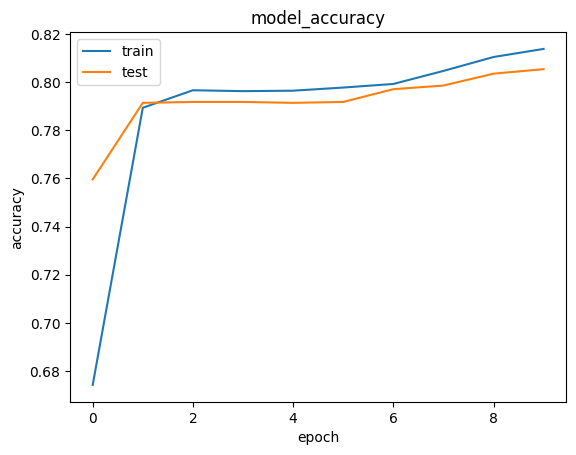

In [29]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

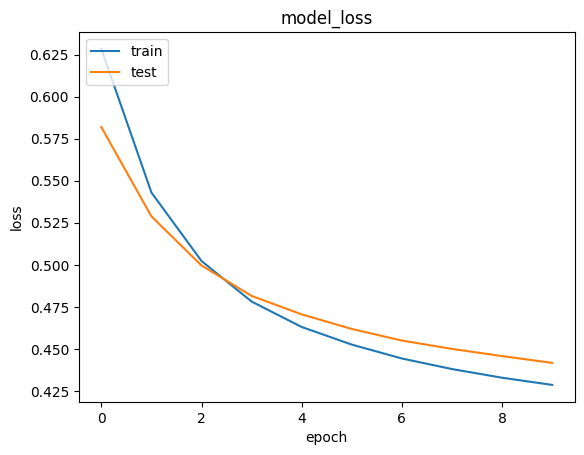

In [30]:

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()